# Wprowadzenie do pracy w Google Colab
Google Colab bazuje na Jupyter Notebook.

**Aby uruchomić kod kliknij we fragment kodu i wciśnij Ctrl+Enter**
## Import pakietów
Punktem wyjścia do prac będa pakiety numpy, pandas i csv umozliwiajace kolejno: wygodne obliczenia i operacje na wektorach, reprezenacje i wizualizację dużych porcji danych, wczytywanie danych treningowych z formatu CSV.
Oprócz tego w przypadku korzystania z Google Colab koniecznym będze import modułów pozwalajacych na upload plików z danymi treningowymi na serwer.

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io

## Podstawy podstaw Pythona
(Pomiń to jeśli wiesz o Pythonie cokolwiek)
Python jest jednym z najpopularniejszych (obok R) językiem wykorzystywanym w szeroko rozumianej Data Science.
W Pythonie możliwe jest programowanie obiektowe, programowanie strukturalne i programowanie funkcyjne. Typy sprawdzane są dynamicznie, a do zarządzania pamięcią stosuje się garbage collection.

Dla osób, które nie miały nigdy nic wspólnego z Pythonem, sugeruję przejrzenie [Tutorialu](https://docs.python.org/3/tutorial/) i innych materiałów dostępnych w sieci.

In [ ]:
# deklaracja zmiennych -- dynamiczne typowanie
x=12
y='tekst'

# Python ma silne typowanie --  przy wypisywaniu zmiennych numerycznych i
# konkatenacji ze stringiem, konieczna jest konwersja explicite do string
print('To są moje zmienne: '+str(x)+' '+y)

# Listy zapisuje się w notacji podobnej do Prologa, Matlaba, Octava
lista = [1,2,3,4.5]
print('to lista '+str(lista))

# Mimo, że Python jest językiem (również) obiektowym, to wiele funkcji
# uzywanych jest jak globalne

dl = len(lista)
print('Długośćlisty to: '+str(dl))

# Pętle i instrukcje warunkowe (wcięcia są ważne!)
for element in lista:
  print(element)

if x < 10:
  print('Mniejsze od 10')
else:
  print('Może 10, może wiecej')


To są moje zmienne: 12 tekst
to lista [1, 2, 3, 4.5]
Długośćlisty to: 4
1
2
3
4.5
Może 10, może wiecej


In [ ]:
# Iterowanie po elementach listy a wydajność
duza_lista = np.random.randint(2, size=10000000)

# Policz ile jest 1-nek
import time

start = time.time()
print(len(duza_lista[duza_lista==1]))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

start = time.time()
print(sum([1 for e in duza_lista if e == 1]))
s = 0
stop = time.time()
print('Czas wykonania: ' + str(stop-start))


start = time.time()
for e in duza_lista:
  if e == 1: s+=1
print(s)
stop = time.time()
print('Czas wykonania: ' + str(stop-start))


5002541
Czas wykonania: 0.11101007461547852
5002541
Czas wykonania: 2.405383586883545
5002541
Czas wykonania: 4.284901857376099


In [ ]:
# Definiowanie funkcji -- nigdy nie staraj się definiowac funkcji, które już są.
def srednia(lista):
  return sum(lista)/len(lista)

start = time.time()
print('Srednia z listy to '+str(srednia(duza_lista)))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

start = time.time()
print('Srednia z listy to '+str(np.mean(duza_lista)))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

Srednia z listy to 0.5002541
Czas wykonania: 0.8447220325469971
Srednia z listy to 0.5002541
Czas wykonania: 0.01403665542602539


In [ ]:
# Słowniki to tablice asocjacyjne
dict = {'Name': 'Zara', 'Age': 21, 'Class': 'Machine Learning'}
dict['Age'] = 22; # update existing entry
dict['School'] = "UJ"; # Add new entry

print("dict['Age']: ", dict['Age'])
print("dict['School']: ", dict['School'])

dict['Age']:  22
dict['School']:  UJ


## Wczytywanie plików
Poniżej przyklad wczytania pliku z danymi treningowymi, załadowania go do DataFrame i wyświetlenia.
Zwróć uwagę, że podczas uploadu można wybrać więcej plików niż jeden.
Plik, który należy załadować znajdue się tutaj [House sales](https://pegaz.uj.edu.pl/mod/resource/view.php?id=1872227)

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['kc_house_data.csv'].decode('utf-8')))
df

KeyError: ignored

### Lokalnie
Jeśli pracujesz lokalnie na swoim własnym jupyter notebook, to wczytujemy analogicznie ale bez uploadu i dekodowania

In [ ]:
df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Manipulowanie DataFrame
Wybieranie danych z DF odbywa sie intuicyjnie, poprzez podanie nazwy kolumny, lub listy kolumn w **nawiasach kwadratowych**

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

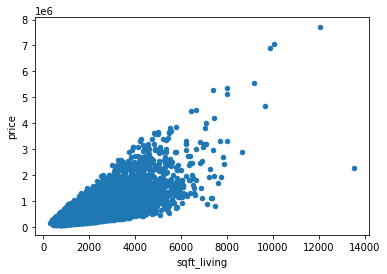

In [ ]:
# wybierz tylko jedną kolumnę
bedrooms = df['sqft_living']

# wybierz dwie kolumny
bedprice = df[['sqft_living', 'price']]


# zrób wykres ceny względem powierzchni
bedprice.plot.scatter(x='sqft_living',y='price')

In [ ]:
# Indeksy -- każdy wiersz jest indeksowany domyślnie integerem.
bedprice.index
print('Here is what we have at the index 1210: ')
print(bedprice.loc[1210])
print(bedprice.iloc[1210])


Here is what we have at the index 1210: 
sqft_living      1760.0
price          585000.0
Name: 1210, dtype: float64
sqft_living      1760.0
price          585000.0
Name: 1210, dtype: float64


In [ ]:
# Zmiana indeksowania może generować nieoczekiwane wyniki podczas wybierania danych

bedprice.set_index('sqft_living', inplace=True)
print('Here is what we have at the index 1210: ')
print(bedprice.loc[1210])
print(bedprice.iloc[1210])


Here is what we have at the index 1210: 
                price
sqft_living          
1210         290000.0
1210         529000.0
1210         200000.0
1210         380000.0
1210         510000.0
...               ...
1210         437500.0
1210         500000.0
1210         610000.0
1210         461100.0
1210         414500.0

[88 rows x 1 columns]
price    585000.0
Name: 1760, dtype: float64


In [ ]:
# Tworzymy nową dataframe z nowymi danymi z wykorzystaniem Series
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

df = pd.DataFrame({ 'City name': city_names, 'Population': population })
df

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [ ]:
# Worzymy nową z wykorzystaniem słowników
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df

,x,y
0,Pierwszy,222
1,Drugi,333


In [ ]:
#Modyfikujemy oryginalną mimo, że możemy podejrzewać, że tak się nie stanie
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[0:1]
df_sub.x = 'Trzeci'
print(df)
print(df_sub)


        x    y
0  Trzeci  222
1   Drugi  333
        x    y
0  Trzeci  222


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#Jeśil chcemy pracować na kopii, to explicite:
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[0:1].copy()
df_sub.x = 'Trzeci'
print(df)
print(df_sub)


          x    y
0  Pierwszy  222
1     Drugi  333
        x    y
0  Trzeci  222


In [ ]:

#Yikes... Nie wiadomo co się stanie -- raz wartość w df zostanie zmieniona, raz nie
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[['x','y']]
df_sub['x'][0] = 'Czwarty'
print(df)
print(df_sub)



          x    y
0  Pierwszy  222
1     Drugi  333
         x    y
0  Czwarty  222
1    Drugi  333


<ipython-input-21-2847c21a1af3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['x'][0] = 'Czwarty'


In [ ]:
# Dodanie nowej kolumny do DF, z domyślną wartością
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df['Z'] = -1
df.loc[:,'Kolejna'] = -2
df

,x,y,Z,Kolejna
0,Pierwszy,222,-1,-2
1,Drugi,333,-1,-2


In [ ]:
#Zmiana wartości poprawnie to uzywamy loc.
#Unikamy tzw. chained indexing [a][b][c] na rzecz loc[a,b,c]:
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[['x','y']]
df_sub.loc[0,'x'] = 'Piąty'
print(df)
print(df_sub)

          x    y
0  Pierwszy  222
1     Drugi  333
       x    y
0  Piąty  222
1  Drugi  333


In [ ]:
# Iterowanie po wierszach DF różni sie trochę od iterowania po listach
df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
bedprice = df[['sqft_living', 'price']]
# nie o to nam chodziło (nagłówek tez jest wierszem)
for row in bedprice:
  print('Powierzchnia: '+str(row[0]), 'cena: '+str(row[1]))

# nieźle i wygodnie
for idx, row in bedprice.iterrows():
  print('Powierzchnia: '+str(row['sqft_living']), 'cena: '+str(row['price']))

# czasem o niebo szybciej niż powyższe
for row in bedprice.itertuples():
  print('Powierzchnia: '+str(getattr(row,'sqft_living')), 'cena: '+str(getattr(row,'price')))



Powierzchnia: 1180 cena: 221900.0


## Operacje na wektorach
Do operacji na wektorach można używac wymiennie pakietu numpy, albo Pandas.

In [ ]:
# iloczyn skalarny kolumny 'price' z użyciem Pandas
res = df['price'].dot(df['price'])
print(res)

# iloczyn skalarny kolumny 'price' z użyciem numpy
# values zwraca surową tablicę numpy
numpy_vals = df['price'].values
res = numpy_vals.dot(numpy_vals)
print(res)


In [ ]:
# Z numpy możemy wygodnie manipulować danymi w formacie Matlabowym
#matrix = df.as_matrix(columns=['sqft_living','bedrooms',	'bathrooms','price'])
matrix = df[['sqft_living','bedrooms',	'bathrooms','price']].values
print(matrix)

# tylko dwie pierwsze kolumny
print('Kolumny')
print(matrix[:,0:2])

# tylko dwa pierwse wiersze
print('Wiersze')
print(matrix[0:2,:])

[[1.18000e+03 3.00000e+00 1.00000e+00 2.21900e+05]
 [2.57000e+03 3.00000e+00 2.25000e+00 5.38000e+05]
 [7.70000e+02 2.00000e+00 1.00000e+00 1.80000e+05]
 ...
 [1.02000e+03 2.00000e+00 7.50000e-01 4.02101e+05]
 [1.60000e+03 3.00000e+00 2.50000e+00 4.00000e+05]
 [1.02000e+03 2.00000e+00 7.50000e-01 3.25000e+05]]
Kolumny
[[1.18e+03 3.00e+00]
 [2.57e+03 3.00e+00]
 [7.70e+02 2.00e+00]
 ...
 [1.02e+03 2.00e+00]
 [1.60e+03 3.00e+00]
 [1.02e+03 2.00e+00]]
Wiersze
[[1.180e+03 3.000e+00 1.000e+00 2.219e+05]
 [2.570e+03 3.000e+00 2.250e+00 5.380e+05]]


# Zadania
## Wczytaj plik z danymi, który znajduje się tutaj: [House sales - real dataset]('https://szymon.bobek.re/kc_house_data_moreal_full.csv')

**Zwróć uwagę, że niektórych danych brakuje** Nie są to jednak typowe dla Pandas i Numpy `np.NaN`. Plik znajduje sie również pod adresem: `https://szymon.bobek.re/kc_house_data_moreal_full.csv`

Możesz postąpić z tymi danymi w następujacy sposób
  1. Zastąpić brakujące wartości je wartośćią `np.NaN`
  2. Usunąć rekordy z brakujacymi danymi
  3. Uzupełnić je średnią, mediana, lub dominantą
  4. Zastosować coś bardziej fancy, np. [Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)


In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io

In [ ]:
ds=pd.read_csv("https://szymon.bobek.re/kc_house_data_moreal_full.csv",delimiter=';')
ds.replace("NaN",np.NaN)
ds.replace('?',np.NaN)
ds.replace(np.NaN,0)
ds.fillna(0)
ds['sold']=1

## Ile jest elementów (wierszy) w zbiorze? A ile jest kolumn (cech)?

In [ ]:
ds.shape

(23990, 25)

## Wyświetl 10 pierwszych wierszy pliku

In [ ]:
ds.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,showers,electricity,school_1mi
0,0,20141013T000000,221900.0,3.0,1.0,1180.0,5650,1.0,0.0,0.0,...,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,0.0,1.0,1.0,1.0
1,1,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0.0,0.0,...,1991.0,98125.0,47.721000000000004,-122.319,1690.0,7639.0,1.0,2.0,1.0,1.0
2,2,20150225T000000,180000.0,2.0,1.0,770.0,10000,1.0,0.0,0.0,...,0.0,98028.0,47.7379,-122.23299999999999,2720.0,8062.0,0.0,1.0,1.0,1.0
3,3,20141209T000000,604000.0,4.0,3.0,1960.0,5000,1.0,0.0,0.0,...,0.0,98136.0,47.5208,-122.39299999999999,1360.0,5000.0,1.0,3.0,1.0,?
4,4,20150218T000000,510000.0,3.0,2.0,1680.0,8080,1.0,0.0,0.0,...,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0.0,2.0,1.0,1.0
5,5,20140512T000000,1225000.0,4.0,4.5,5420.0,101930,1.0,0.0,0.0,...,0.0,98053.0,47.6561,-122.005,4760.0,101930.0,1.0,5.0,1.0,1.0
6,6,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2.0,0.0,0.0,...,0.0,98003.0,47.3097,-122.32700000000001,2238.0,6819.0,0.0,2.0,1.0,1.0
7,7,20150115T000000,291850.0,3.0,1.5,1060.0,9711,1.0,0.0,0.0,...,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,0.0,2.0,1.0,?
8,8,20150415T000000,229500.0,3.0,1.0,1780.0,7470,1.0,0.0,0.0,...,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,1.0,1.0,1.0,1.0
9,9,20150312T000000,323000.0,3.0,2.5,1890.0,6560,2.0,0.0,0.0,...,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,0.0,3.0,1.0,1.0


## Uwórz kopię DataFrame, która będzie zaierać 5 pierwszych kolumn
Upewnij się, że nowo utworzona struktura to faktycznie DataFrame. Można to zrobić:

``` python
type(newDataFrame)
```


In [ ]:
NDF=ds.head(5)
print(type(NDF))
NDF.shape

<class 'pandas.core.frame.DataFrame'>


(5, 25)

## W której obszarze identyfikowanym przez kod pocztowy sprzedano najwięcej domów?

In [ ]:
knownlocations=ds[ds['zipcode']!='?']
knv=knownlocations.groupby(['zipcode'])['sold'].sum()
knv=knv.sort_values(ascending=False)
knv.head(5)

zipcode
98103.0    604
98038.0    591
98115.0    584
98052.0    574
98117.0    553
Name: sold, dtype: int64

## W której obszarze identyfikowanym przez kod pocztowy sprzedano najwięcej domów z przynajmniej dwoma łazienkami?

In [ ]:
knownlocations_2bath=ds[(ds['zipcode']!='?') & (ds['bathrooms'].apply(lambda x: -1 if x=='?' else np.double(x))>=2)]
knv=knownlocations_2bath.groupby(['zipcode'])['sold'].sum()
knv=knv.sort_values(ascending=False)
knv.head(5)

zipcode
98038.0    516
98052.0    442
98006.0    408
98074.0    387
98042.0    370
Name: sold, dtype: int64

## Ile jest różnych obszarów identyfikowanych przez kod pocztowy?

In [ ]:
aaa=ds[(ds['zipcode']!='?')].groupby(['zipcode'])['sold'].sum()
aaa

zipcode
10300      216
98001.0    365
98002.0    200
98003.0    281
98004.0    319
          ... 
98177.0    256
98178.0    262
98188.0    137
98198.0    282
98199.0    319
Name: sold, Length: 71, dtype: int64

## Jaki jest procentowy udział w ilości sprzedanych domów poszczególnych obszarów (identyfikowanych przez zipcode)

In [ ]:
total_sales=knownlocations['sold'].sum()
print(total_sales)
aaa=pd.DataFrame(aaa)
aaa['percentage_of_sales']=aaa.sold/total_sales
aaa

21890


,sold,percentage_of_sales
zipcode,,
10300,216,0.009868
98001.0,365,0.016674
98002.0,200,0.009137
98003.0,281,0.012837
98004.0,319,0.014573
...,...,...
98178.0,262,0.011969
98188.0,137,0.006259
98198.0,282,0.012883


## Jaka jest największa, najmniejsza i średnia powierzchnia domu jaki został sprzedany?

In [ ]:
sqft_sure=ds[ds['sqft_living']!='?']
sqft_sure['sqft_living'] = pd.to_numeric(sqft_sure['sqft_living'])
print(f"The minimum is: {sqft_sure['sqft_living'].min()}. The maximum is: {sqft_sure['sqft_living'].max()}")


The minimum is: 59.6641130440737. The maximum is: 13540.0


<ipython-input-74-b9afc19aeb9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqft_sure['sqft_living'] = pd.to_numeric(sqft_sure['sqft_living'])


## W jakim obszarze średnia powierzchnia sprzedanych domów jest największa/najmniejsza

In [ ]:
zip_sqft=ds[(ds['zipcode']!='?') & (ds['sqft_living'] !='?')]
zip_sqft['sqft_living'] = pd.to_numeric(zip_sqft['sqft_living'])
averages_zips = zip_sqft.groupby('zipcode')[['sqft_living', 'sold']].sum()
averages_zips['average_sqft']=averages_zips['sqft_living']/averages_zips['sold']
print(f"The largest average sqft area of a house is in: {averages_zips['average_sqft'].idxmax()} and the lowest in : {averages_zips['average_sqft'].idxmin()}")

The largest average sqft area of a house is in: 98039.0 and the lowest in : 98168.0


<ipython-input-83-685f3b908323>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_sqft['sqft_living'] = pd.to_numeric(zip_sqft['sqft_living'])


## Z ilu różnych obszarów pochodzą domy (ile jest różnych kodów pocztowych)?

In [ ]:
ds[(ds['zipcode']!='?')].groupby('zipcode').size()

zipcode
10300      216
98001.0    365
98002.0    200
98003.0    281
98004.0    319
          ... 
98177.0    256
98178.0    262
98188.0    137
98198.0    282
98199.0    319
Length: 71, dtype: int64

## Ile jest domów wybudowanych przed 1995 rokiem?

In [ ]:
year_recorded=ds[ds['yr_built']!='?']
year_recorded['yr_built']=pd.to_numeric(year_recorded['yr_built'])
before1995=year_recorded[year_recorded['yr_built']<1995]['yr_built'].size
before1995

<ipython-input-98-a3b254e02f47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_recorded['yr_built']=pd.to_numeric(year_recorded['yr_built'])


16042

## W ilu przypadkach po renowacji domu powierzchnia zwiększyła się? Jaka jest średnia dobudówek po renowacji?

In [ ]:
renovation_info_provided=ds[(ds['sqft_living']!='?') & (ds['sqft_living15']!='?')]
increase_after_renovation=renovation_info_provided[renovation_info_provided['sqft_living']<renovation_info_provided['sqft_living15']]
increase_after_renovation['id'].size


8256

## Jakie są średnie ceny domów w poszczególnych obaszarach reprezentowanych przez zipcode?

In [ ]:
zip_price=ds[(ds['zipcode']!='?') & (ds['price'] !='?')]
zip_price['price'] = pd.to_numeric(zip_price['price'])
zip_price_by_area=zip_price.groupby('zipcode')['price','sold'].sum()
zip_price_by_area['avg_price_in_area']=zip_price_by_area['price']/zip_price_by_area['sold']

pd.set_option('display.float_format', lambda x: '%.5f' % x)

zip_price_by_area['avg_price_in_area'].describe()

<ipython-input-110-8e34c0fc4846>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_price['price'] = pd.to_numeric(zip_price['price'])
<ipython-input-110-8e34c0fc4846>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zip_price_by_area=zip_price.groupby('zipcode')['price','sold'].sum()


count        71.00000
mean     631131.94380
std      666022.84706
min      234205.11500
25%      354551.78986
50%      493442.73404
75%      660942.86854
max     5575111.78854
Name: avg_price_in_area, dtype: float64

## Ile domów zostało sprzedanych w marcu?

In [ ]:
known_date=ds[ds['date']!='?']
sold_in_march=known_date.copy()
sold_in_march=sold_in_march[sold_in_march['date'].apply(lambda x: x[4:6])=='03']
sold_in_march['id'].size


1919

## Jaka jest średnia cena domów sprzedanych w poszczególnych miesiącach roku?

In [ ]:
months=known_date.copy()
months['date']=months['date'].apply(lambda x: x[4:6])
months=months.groupby('date')['price','sold'].sum()

months['average price']=months['price']/months['sold']
months['average price'].head(12)


<ipython-input-136-88fa281771d7>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  months=months.groupby('date')['price','sold'].sum()


date
01   569339.77372
02   538017.08750
03   603989.31064
04   613913.74787
05   584186.82137
06   583687.18249
07   612183.40891
08   590383.90311
09   589885.34433
10   586455.90812
11   573222.01101
12   589218.35635
Name: average price, dtype: float64

## Dodatkowe zadania
  1. Jaka jest przyrost w sprzedaży pomiędzy kolejnymi dniami. Np. jeśli 07 marca sprzedano 100 domów, a 08 marca sprzedano 150 domów, to przyrost 08 marca wynosi 50 domów.
  2. Zagreguj dane tak aby pokazywały subaryczną tygodniową sprzedaż (podpowiedź użyj funkcji [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) )
  3. Napisz fragment kodu, który wybierze domy z każdego obszaru, których powierzchania jest mniejsza od średniej z tego obszaru
  4. Napisz funkcję, która określi czy w danym obszarze trend ilośći sprzedanych domów jest rosnacy lub malejacy (podpowiedź -- można użyć funkcji [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) oraz funkcji [linregres](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) i zwracanego przez nią parametru slope)